In [ ]:
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

In [ ]:
# Menerapkan dictionary untuk membuat dataframe
df = pd.DataFrame({'Speed': [1.2, 2.5, 3.1, 1.6, 2.7, 6, 7.2, 6.1, 7, 6.1, 8.3, 9, 10, 8,9 ],
                     'Power': [3,4,5,3,5,7,8,8,9,7,9,10,11,9,9]
                   })

# Display dataframe
df

,Speed,Power
0,1.2,3
1,2.5,4
2,3.1,5
3,1.6,3
4,2.7,5
5,6.0,7
6,7.2,8
7,6.1,8
8,7.0,9
9,6.1,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Speed   15 non-null     float64
 1   Power   15 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 368.0 bytes


In [ ]:
df.describe()

,Speed,Power
count,15.000000,15.000000
mean,5.853333,7.133333
std,2.920095,2.559762
min,1.200000,3.000000
25%,2.900000,5.000000
50%,6.100000,8.000000
75%,8.150000,9.000000
max,10.000000,11.000000


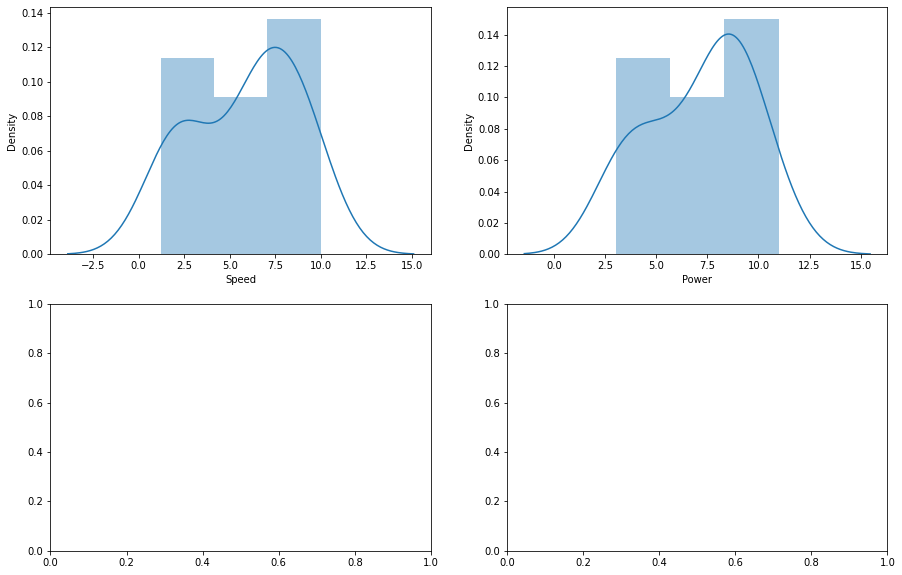

In [ ]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.distplot(df["Speed"], ax=axes[0, 0])
sns.distplot(df["Power"], ax=axes[0, 1])
plt.show()

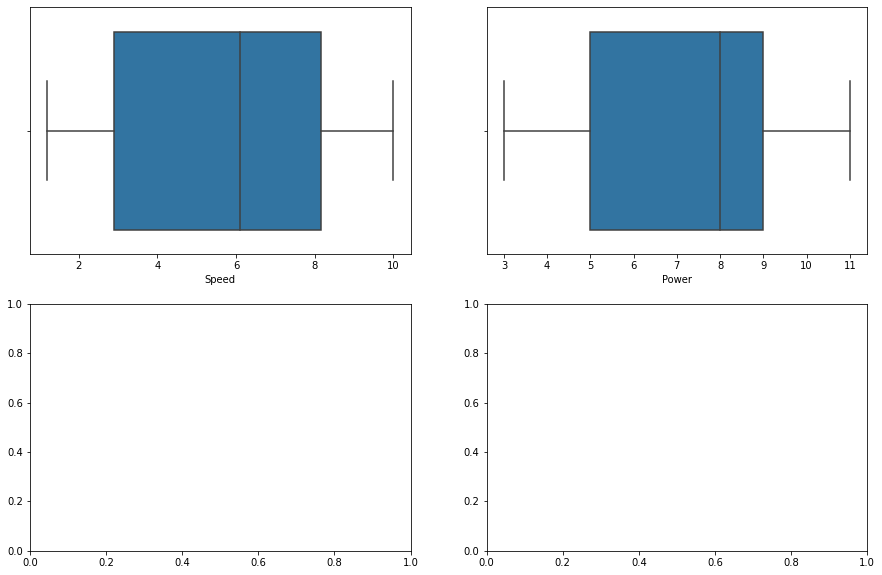

In [ ]:
# Cek normalitas data dengan boxplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(df["Speed"], ax=axes[0, 0])
sns.boxplot(df["Power"], ax=axes[0, 1])
plt.show()

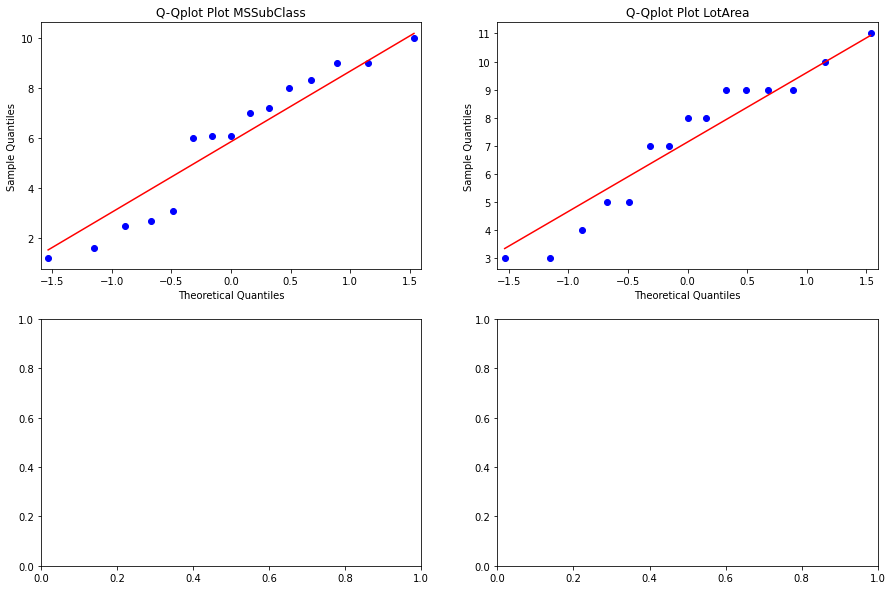

In [ ]:
# Cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sm.graphics.qqplot(df["Speed"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot MSSubClass')

sm.graphics.qqplot(df["Power"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot LotArea')

plt.show()

In [ ]:
#### Uji Linearitas

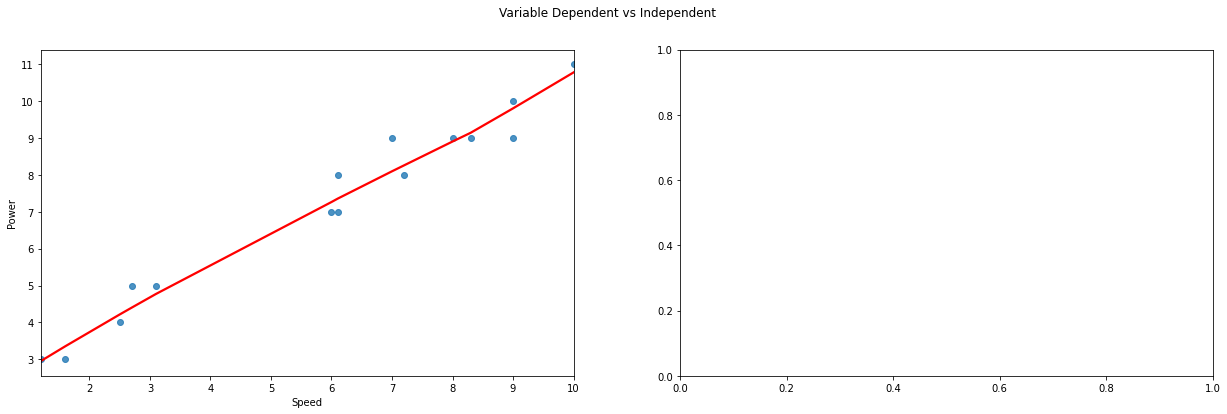

In [ ]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(1, 2, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=df["Speed"], y=df["Power"], lowess=True, line_kws={'color': 'red'}, ax=axes[0])
plt.show()

## 3 Membangun Model Regresi

In [ ]:
x = df['Speed'].values.reshape(-1,1)
y= df['Power'].values.reshape(-1,1)

### Membangun Model dengan Sklearn

In [ ]:
lrmodel = LinearRegression()
lrmodel.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Asumsi Analisis Regresi

**Asumsi Residual Distribusi Normal**

In [ ]:
prediksi = lrmodel.predict(x)
df = pd.DataFrame(x,columns=['Speed'])
df['Power'] = y
df['prediction'] = prediksi
df['residual'] = y-prediksi

df.head(5)

,Speed,Power,prediction,residual
0,1.2,3,3.122547,-0.122547
1,2.5,4,4.243039,-0.243039
2,3.1,5,4.760189,0.239811
3,1.6,3,3.467314,-0.467314
4,2.7,5,4.415422,0.584578


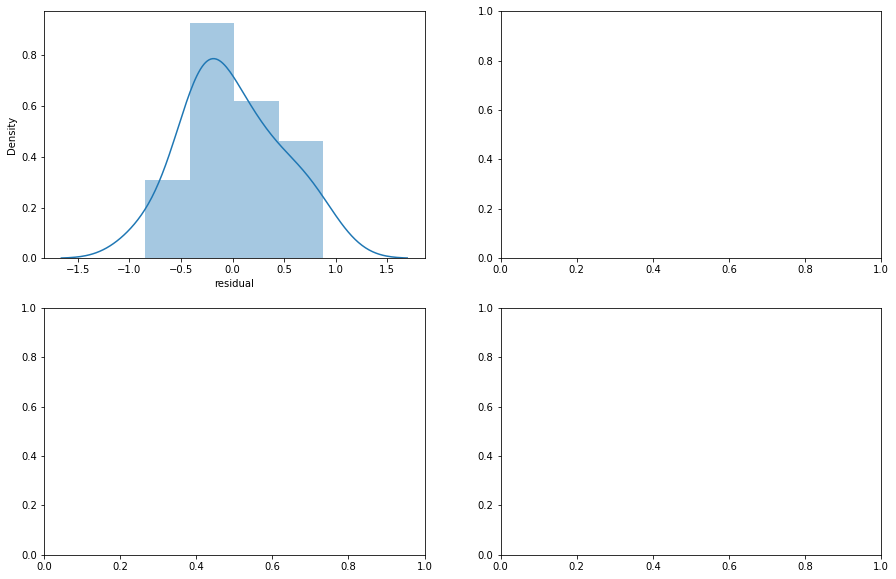

In [ ]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.distplot(df["residual"], ax=axes[0, 0])
plt.show()

**Asumsi No autokorelasi**


In [ ]:
statsmodels.stats.stattools.durbin_watson(df.residual, axis=0)

1.9760332647512808

**Asumsi Homoskedastisitas**

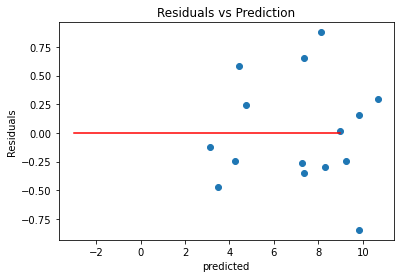

In [ ]:
asm_homosk = plt.scatter(df['prediction'], df["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
asm_homosk = sns.lineplot([-3,9],[0,0],color='red')
asm_homosk = plt.title('Residuals vs Prediction')

#### Evaluasi Model

### Membangun model dengan package Statsmodels

In [ ]:
#Masukkan intercepts secara manual
Input = sm.add_constant(x)

#Modelling dengan statmodels
SimpleModel = sm.OLS(y,Input, missing ='drop')
results = SimpleModel.fit()

#priint result
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     378.3
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           5.40e-11
Time:                        12:33:16   Log-Likelihood:                -9.3319
No. Observations:                  15   AIC:                             22.66
Df Residuals:                      13   BIC:                             24.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0882      0.288      7.252      0.0

### Uji Partial & Serentak Analisis Regresi

In [ ]:
t_test_const, t_test_X1 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)

T-test score const:  7.252027542360029
T-test score X1:  19.449216019471883


Uji kelayakan model F-test memilki tujuan, apakah model yang dibentuk layak digunakan atau tidak

In [ ]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  378.2720037720819
P-value :  5.401216957570596e-11
Tolak H0
